In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from unwrap import unWrapDisplayer
from unwrap import unwrap

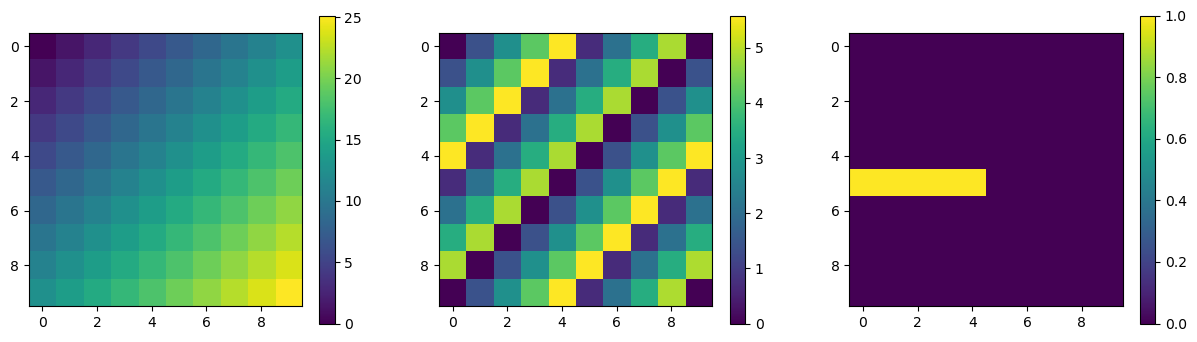

In [40]:
SIZE = (10,10)
MINPHASE = 0
MAXPHASE = 8*np.pi

# Display phase image
x = np.linspace(MINPHASE,MAXPHASE,SIZE[0])
y = np.linspace(MINPHASE,MAXPHASE,SIZE[1])

xv, yv = np.meshgrid(x,y)
phase_unwrapped = (xv+yv)/2
phase_wrapped = np.mod(phase_unwrapped, 2*np.pi)

branchCuts = np.zeros((SIZE[0],SIZE[1]),dtype=bool)
branchCuts[SIZE[0]//2,:SIZE[1]//2] = True
#branchCuts[:SIZE[0]//2,SIZE[1]//2] = True

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(phase_unwrapped)
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(phase_wrapped)
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(branchCuts)
plt.colorbar()


plt.show()

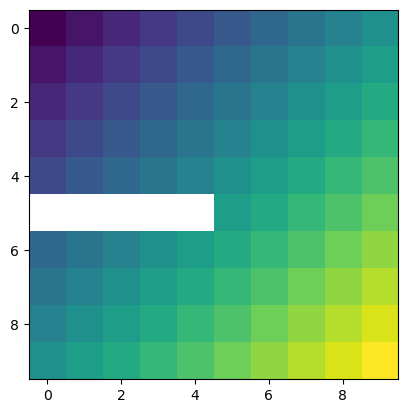

In [41]:
plt.imshow(unwrap(phase_wrapped,(1,1),branchCuts))

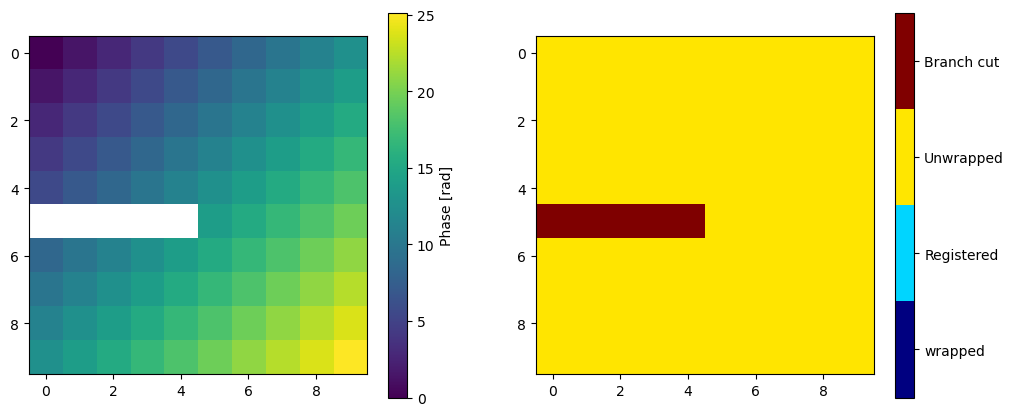

In [47]:
phase_wrapped[branchCuts] = np.nan

displayer = unWrapDisplayer(phase_wrapped, seed=(0,0), branchCuts=branchCuts, mode='bfs')

convergence = False
while not convergence:
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    im = ax[0].imshow(displayer.f_phase,vmin= MINPHASE, vmax = MAXPHASE)
    fig.colorbar(im,label='Phase [rad]')

    cmap = plt.get_cmap('jet', 4)
    im = ax[1].imshow(displayer.registry.astype(int) + displayer.unwrapped.astype(int) + 3*branchCuts.astype(int),vmin=-0.5,vmax=3.5,cmap=cmap)
    cbar = fig.colorbar(im)
    cbar.ax.locator_params(nbins=4)
    cbar.set_ticks([0,1,2,3])
    cbar.set_ticklabels(['wrapped', 'Registered', 'Unwrapped', 'Branch cut'])
    convergence = displayer.update()
    
    if not convergence:
        display(fig)
        clear_output(wait=True) 
        plt.close()
